In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("resnet34_3d_seg-round-2.csv")
df

,epoch,lr,loss_train,loss_val,fbeta_0.20,fbeta_0.25,fbeta_0.30,fbeta_0.35,fbeta_0.40,fbeta_0.45,...,fbeta_0.55,fbeta_0.60,fbeta_0.65,fbeta_0.70,fbeta_0.75,fbeta_0.80,fbeta_0.85,fbeta_0.90,fbeta_0.95,accuracy
0,1,4.000000e-06,0.700122,0.625758,0.181590,0.199105,0.215815,0.231381,0.243531,0.252163,...,0.211420,0.141096,0.063748,0.016348,0.002490,0.000103,0.000000,0.000000,0.000000,0.826765
1,2,6.894754e-06,0.678794,0.641748,0.194061,0.211261,0.221577,0.231700,0.243407,0.257007,...,0.275343,0.276034,0.274980,0.266507,0.235485,0.152893,0.050943,0.004450,0.000000,0.747403
2,3,1.522987e-05,0.650417,0.636217,0.189768,0.219715,0.233075,0.246463,0.258479,0.267092,...,0.278226,0.280141,0.275328,0.261870,0.222942,0.156049,0.072923,0.014517,0.000000,0.763183
3,4,2.800000e-05,0.626388,0.588527,0.211766,0.233220,0.268027,0.284846,0.280055,0.263910,...,0.203784,0.165545,0.121342,0.076118,0.039007,0.019743,0.008918,0.002367,0.000258,0.867248
4,5,4.366489e-05,0.616116,0.599979,0.225433,0.253447,0.264595,0.258003,0.242598,0.224452,...,0.163467,0.110002,0.056894,0.024965,0.010091,0.003129,0.000355,0.000000,0.000000,0.853917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,4.869946e-07,0.279631,0.663407,0.395410,0.381422,0.370232,0.360303,0.350974,0.341406,...,0.322044,0.311272,0.298788,0.284774,0.266830,0.245413,0.218080,0.179978,0.115340,0.887935
96,97,2.743041e-07,0.279926,0.674725,0.369345,0.355311,0.342833,0.330871,0.319856,0.309612,...,0.287856,0.275585,0.261580,0.246785,0.229915,0.209878,0.185465,0.150466,0.092196,0.886780
97,98,1.221970e-07,0.280866,0.673782,0.374591,0.360017,0.347966,0.337308,0.326804,0.316504,...,0.294765,0.283204,0.270258,0.255517,0.238791,0.218287,0.192810,0.156513,0.096312,0.887110
98,99,3.085853e-08,0.281327,0.659571,0.401748,0.387465,0.375986,0.366258,0.357132,0.348045,...,0.328645,0.317771,0.305321,0.291085,0.273393,0.251836,0.223677,0.184136,0.117039,0.888217


(0.3, 0.8)

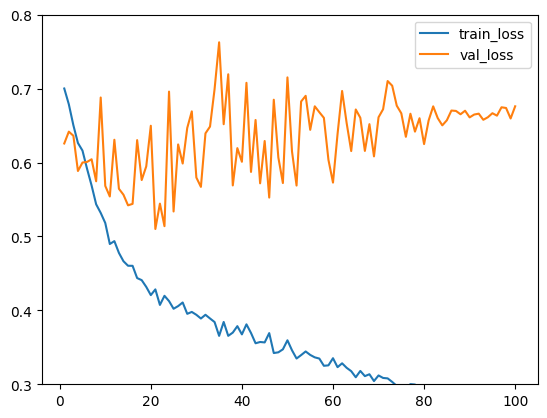

In [44]:
plt.plot(df["epoch"], df["loss_train"], label="train_loss")
plt.plot(df["epoch"], df["loss_val"], label="val_loss")
# plot the moving average of the validation loss
# plt.plot(df["epoch"], df["loss_train"].rolling(2).mean(), label="val_loss")

plt.legend()
plt.ylim(0.3, 0.8)

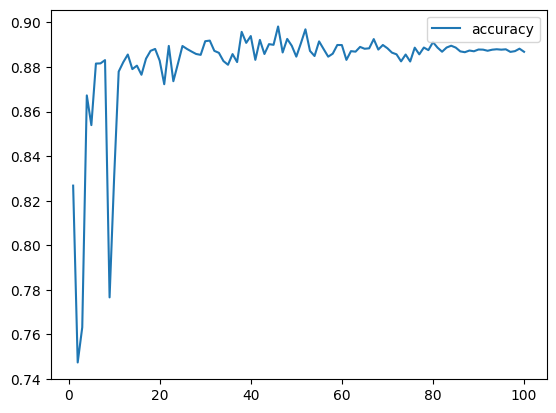

In [45]:
plt.plot(df["epoch"], df["accuracy"], label="accuracy")

plt.legend()
# plt.ylim(0.3, 0.6)

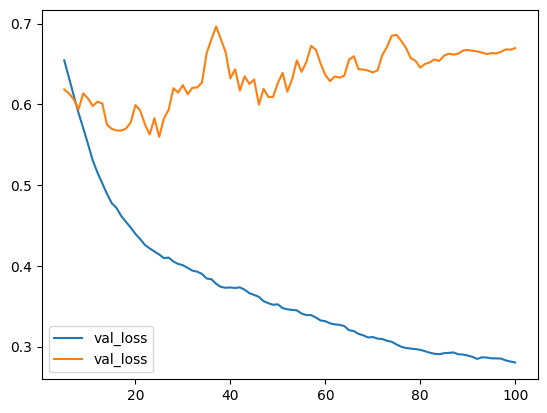

In [46]:
plt.plot(df["epoch"], df["loss_train"].rolling(5).mean(), label="val_loss")
plt.plot(df["epoch"], df["loss_val"].rolling(5).mean(), label="val_loss")

plt.legend()
# plt.ylim(0.05, 0.3)

(100, 16)


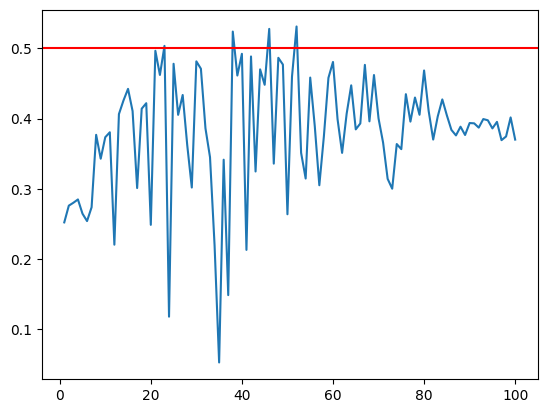

In [47]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
print(df_fbeta.shape)
df_fbeta = np.max(df_fbeta, axis=1)
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")

# put horizontal line at 0.55
plt.axhline(y=0.5, color='r', linestyle='-')


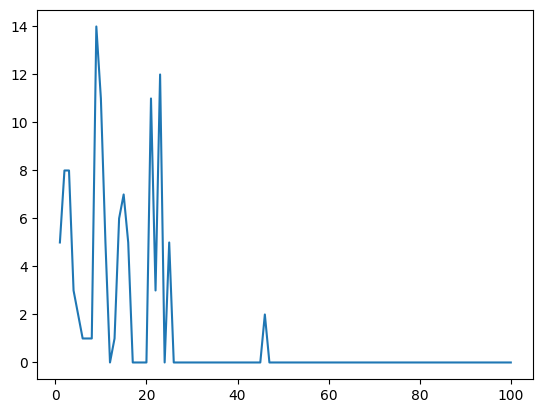

In [48]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
df_fbeta = np.argmax(df_fbeta, axis=1)
df_fbeta.shape
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")